In [48]:
#Show the dataframe shape.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Read the three files into python as dataframes
file1=pd.read_csv('marketing_customer_analysis.csv')
#Show the DataFrame's shape.
display(file1.shape)


(10910, 26)

In [2]:
# Standardize header names
standard_headers_file1= []
for column in file1.columns:
    standard_headers_file1.append(column.lower())
file1.columns = standard_headers_file1
standard_headers_file1= []
for i in range(len(file1.columns)):
    standard_headers_file1.append(file1.columns[i].replace(" ", "_"))
file1.columns = standard_headers_file1
file1=file1.drop(['unnamed:_0'], axis=1)
display(file1.columns)


Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')

In [3]:
file1.columns[3].replace(" ", "_")


'response'

In [4]:
# Which columns are numerical?
file1._get_numeric_data()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [5]:
#Which columns are categorical?
file1.select_dtypes('object')

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [6]:
#Check and deal with NaN values.
display(file1.isna().sum())


customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [7]:
mean_months_since_last_claim = file1['months_since_last_claim'].mean()
mean_months_since_last_claim
file1['months_since_last_claim'] = file1['months_since_last_claim'].fillna(mean_months_since_last_claim)
file1=file1.drop(['state'],axis=1)
file1=file1.drop(['number_of_open_complaints'],axis=1)
file1=file1.drop(['vehicle_class'],axis=1)
file1=file1.drop(['vehicle_size'],axis=1)
mode_vehicle_type = file1['vehicle_type'].mode()
mode_vehicle_type
file1['vehicle_type'] = file1['vehicle_type'].fillna(mode_vehicle_type)
display(file1.isna().sum())

customer                            0
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim             0
months_since_policy_inception       0
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_type                     5481
dtype: int64

In [8]:

# Datetime format - Extract the months from the dataset and store in a separate column.
#Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
import time
from datetime import date
file1['month'] = pd.DatetimeIndex(file1['effective_to_date']).month
file1['month'].unique()
file1[(file1['month']==1) | (file1['month']==2) | (file1['month']==3)]

#BONUS: Put all the previously mentioned data transformations into a function.

,customer,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_last_claim,months_since_policy_inception,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_type,month
0,DK49336,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,...,7.000000,52,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,A,2
1,KX64629,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,...,3.000000,26,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,NaN,1
2,LZ68649,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,...,34.000000,31,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,A,2
3,XL78013,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,...,10.000000,3,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,A,1
4,QA50777,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,...,15.149071,31,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,...,15.149071,40,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,A,1
10906,KX53892,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,...,7.000000,68,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,A,1
10907,TL39050,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,...,11.000000,63,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,NaN,2
10908,WA60547,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,...,0.000000,27,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,A,2


In [9]:
#Show DataFrame info.
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   customer_lifetime_value        10910 non-null  float64
 2   response                       10279 non-null  object 
 3   coverage                       10910 non-null  object 
 4   education                      10910 non-null  object 
 5   effective_to_date              10910 non-null  object 
 6   employmentstatus               10910 non-null  object 
 7   gender                         10910 non-null  object 
 8   income                         10910 non-null  int64  
 9   location_code                  10910 non-null  object 
 10  marital_status                 10910 non-null  object 
 11  monthly_premium_auto           10910 non-null  int64  
 12  months_since_last_claim        10910 non-null 

In [10]:
# Describe DataFrame.
file1.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
monthly_premium_auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,10910.0,15.149071,9.783520,0.000000,7.000000,15.000000,23.000000,35.000000
months_since_policy_inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678
month,10910.0,1.466728,0.498915,1.000000,1.000000,1.000000,2.000000,2.000000


In [11]:
# Show a plot of the total number of responses.
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

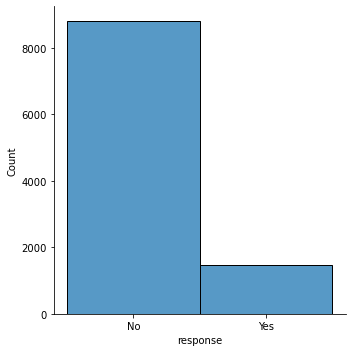

In [12]:
sns.displot(file1["response"])
plt.show()

Text(0, 0.5, 'response_rate')

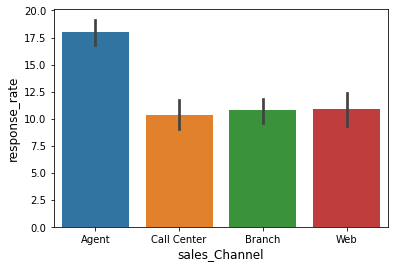

In [13]:
#Show a plot of the response rate by the sales channel.
file1['response_rate'] = np.where(file1.response=='Yes',1,0)
file1['response_rate'] = file1['response_rate']*100
sales_channel_plot = sns.barplot(data=file1, x='sales_channel', y='response_rate')
sales_channel_plot.set_xlabel('sales_Channel', fontsize = 12)
sales_channel_plot.set_ylabel('response_rate', fontsize = 12)



In [14]:
file1.head()

,customer,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_type,month,response_rate
0,DK49336,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,...,52,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,A,2,0
1,KX64629,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,...,26,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,NaN,1,0
2,LZ68649,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,...,31,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,A,2,0
3,XL78013,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,...,3,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,A,1,100
4,QA50777,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,...,31,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,NaN,1,0


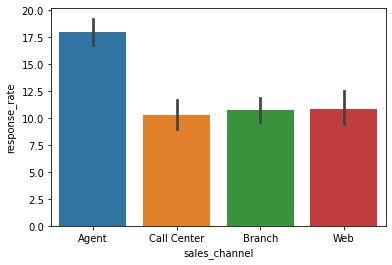

In [15]:
# Show a plot of the response rate by the total claim amount.
p = sns.barplot(data=file1, x='sales_channel', y='response_rate')


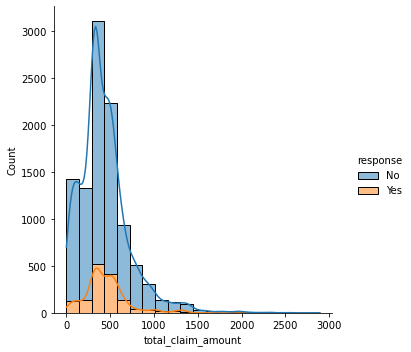

In [16]:
# Show a plot of the response rate by total claim amount
sns.displot(data = file1, x='total_claim_amount', bins=20, hue='response', multiple='stack',kde=True)
plt.show()

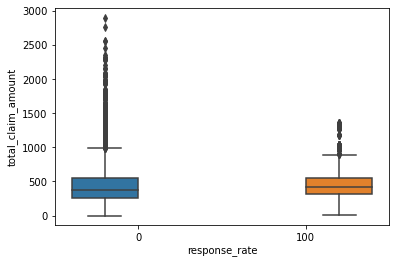

In [17]:
box_plot=sns.boxplot(x='response_rate',y='total_claim_amount',data=file1,hue='response_rate')
plt.legend([],[],frameon=False)

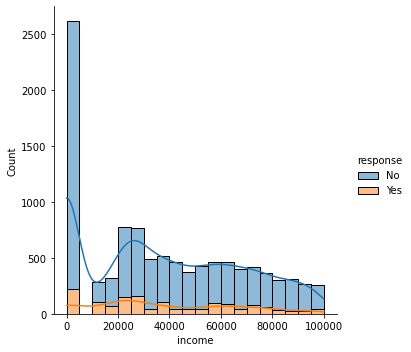

In [18]:
# Show a plot of the response rate by income.
sns.displot(data = file1, x='income', bins=20, hue='response', multiple='stack', kde=True)
plt.show()

In [19]:
#Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
file1.dtypes
categorical=file1.select_dtypes(np.object)
numerical=file1.select_dtypes(np.number)

C:\Users\Jose María\AppData\Local\Temp\ipykernel_25076\4032090123.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical=file1.select_dtypes(np.object)


In [20]:
numerical.columns


Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_policies', 'total_claim_amount', 'month', 'response_rate'],
      dtype='object')

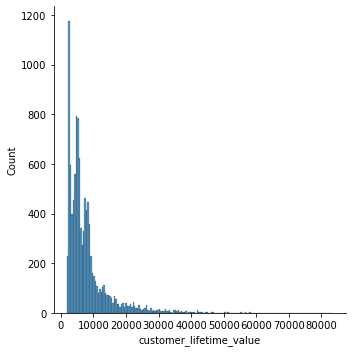

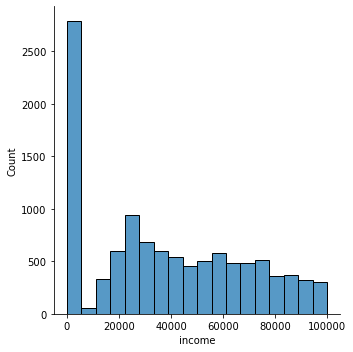

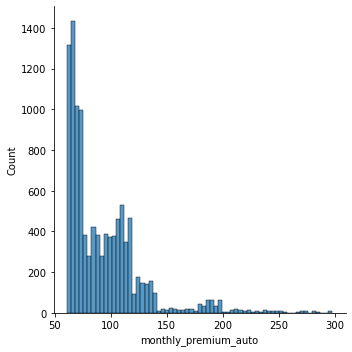

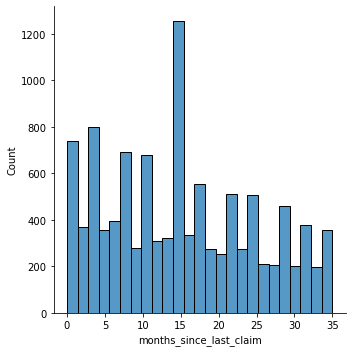

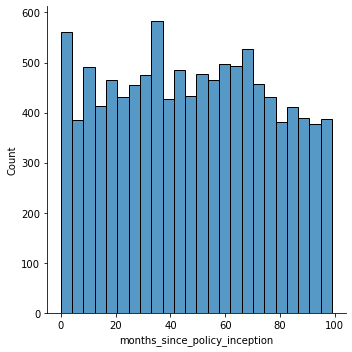

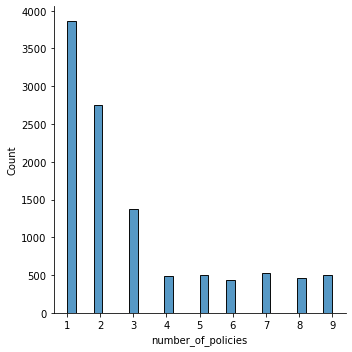

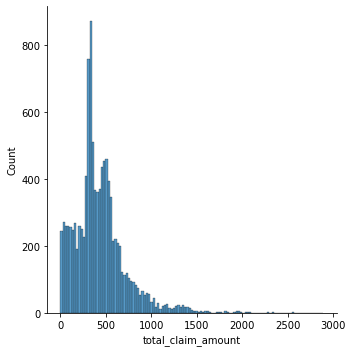

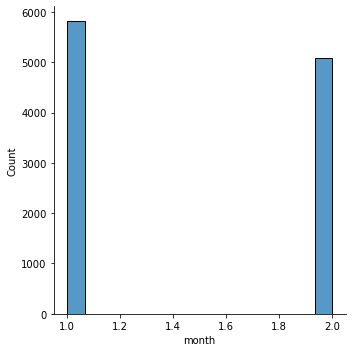

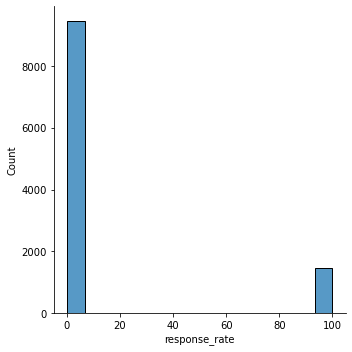

In [21]:
#Now we will try to check the normality of the numerical variables visually
#Use seaborn library to construct distribution plots for the numerical variables

for cat in numerical:
    sns.displot(numerical, x= cat)


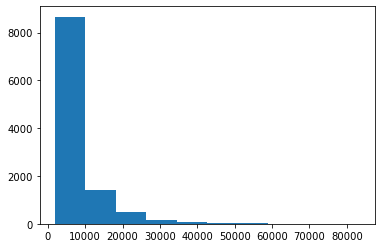

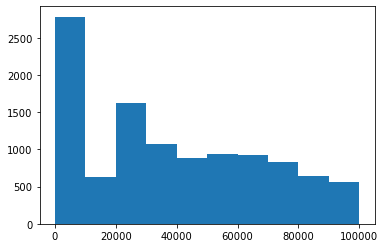

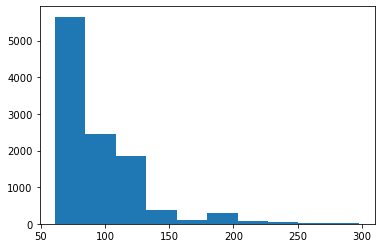

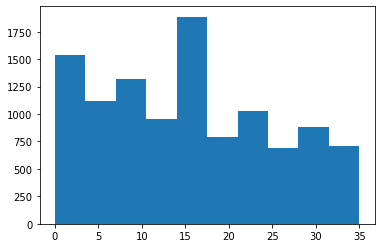

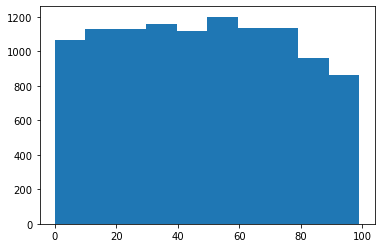

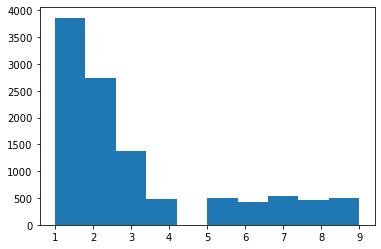

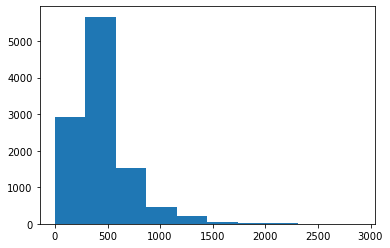

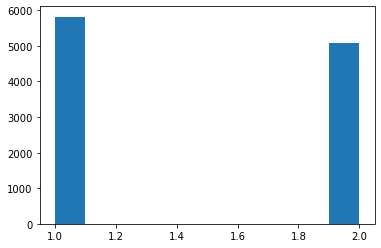

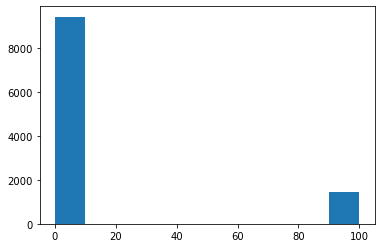

In [22]:
#Use Matplotlib to construct histograms
from matplotlib import pyplot
for cat in numerical:
    plt.hist(numerical[cat])
    plt.show()


'''Do the distributions for different numerical variables look like a normal distribution'''

The months_since_policy_inception sees like the only one with normal distribution

<AxesSubplot:>

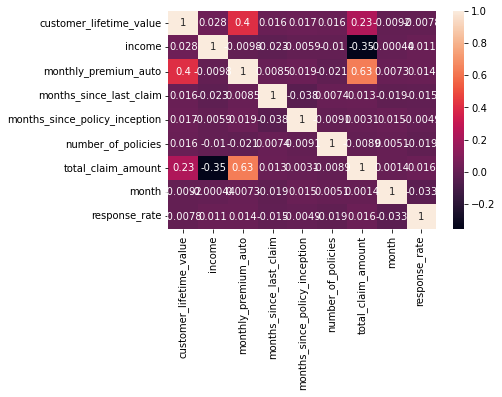

In [40]:
#For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
correlation_matrix=file1.corr()
sns.heatmap(correlation_matrix,annot=True)


# Lab | Customer Analysis Round 5

In [24]:
#We are using the marketing_customer_analysis.csv file.
#Normalize (numerical).

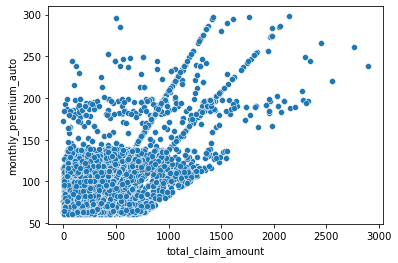

In [34]:
#X-y split.
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error, r2_score
#let's pick the AVGGIFT variable as the one we think is the most explanatory
#To make a predicting model of TARGET_D
sns.scatterplot(x='total_claim_amount',y='monthly_premium_auto',data=file1)
plt.show()

-64.6081404805638
[5.35963084]


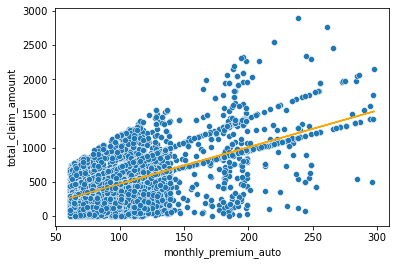

In [38]:
y = file1['total_claim_amount'] #target(a vector;a column); as is a vector, we denoted with a lower letter
X = file1[['monthly_premium_auto']]#fiture
lm=linear_model.LinearRegression()
#let's visualize this result
lm.fit(X,y) # We are fitting (training) the model to the data 
print(lm.intercept_) #intercept; ordenada en el origen
print(lm.coef_)
regression_line = lm.intercept_ + lm.coef_[0]*file1['monthly_premium_auto'] # coef_[0] is to access the list
plt.plot(file1['monthly_premium_auto'], regression_line, c = 'orange')
sns.scatterplot(x='monthly_premium_auto',y='total_claim_amount',data=file1)
plt.show()

# Normalize (numerical)

count    10910.000000
mean        93.196059
std         34.442532
min         61.000000
25%         68.000000
50%         83.000000
75%        109.000000
max        298.000000
Name: monthly_premium_auto, dtype: float64

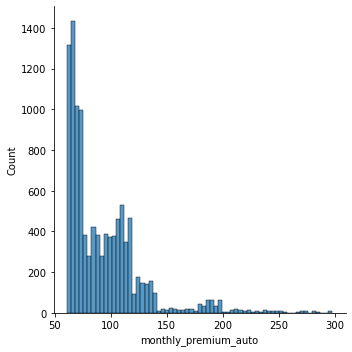

In [42]:
sns.displot(numerical['monthly_premium_auto'])
numerical['monthly_premium_auto'].describe()

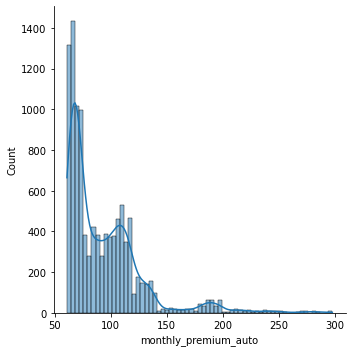

In [55]:
# removing the outliers from IC1 - we don't always do it, only for good reasons
# but if we want to do it, this is how:
iqr = np.percentile(numerical['monthly_premium_auto'],75) - np.percentile(numerical['monthly_premium_auto'],25)
upper_limit = np.percentile(numerical['monthly_premium_auto'],75) + 1.5*iqr #1.5 iqr from Q3, beacuse is the default
lower_limit = np.percentile(numerical['monthly_premium_auto'],25) - 1.5*iqr
sns.displot(numerical['monthly_premium_auto'],kde=True)
plt.show()

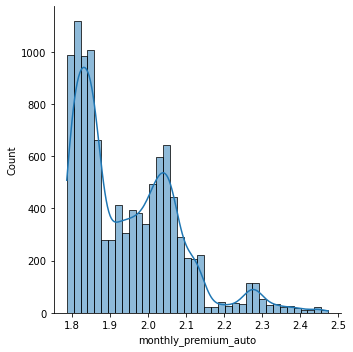

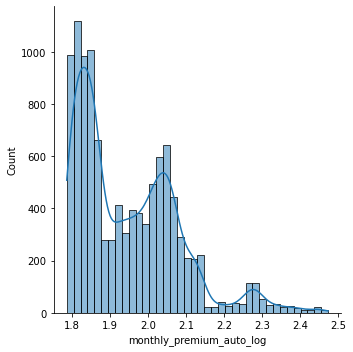

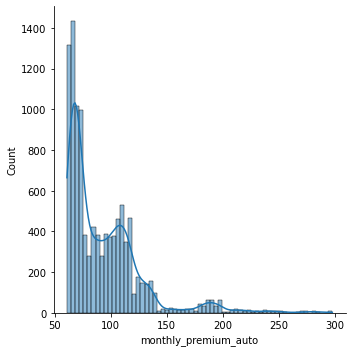

In [66]:
def log_transfom_clean1(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0
monthly_premium_auto_log = numerical['monthly_premium_auto'].apply(lambda x :log_transfom_clean1(x))
sns.displot(monthly_premium_auto_log,kde=True)
def log_transfom_clean2(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # We are returning NaNs so that we can replace them with means later
numerical['monthly_premium_auto_log'] = list(map(log_transfom_clean2, numerical['monthly_premium_auto']))
# Now we replace the NAN by the mean
numerical['monthly_premium_auto_log'] = numerical['monthly_premium_auto_log'].fillna(np.mean(numerical['monthly_premium_auto_log']))
sns.displot(numerical['monthly_premium_auto_log'],kde=True)
# Remove the tails of the transformed column to make it closer to the normal distribution.
iqr = np.percentile(numerical['monthly_premium_auto'],75) - np.percentile(numerical['monthly_premium_auto'],25)
upper_limit = np.percentile(numerical['monthly_premium_auto'],75) + 1.5*iqr #1.5 iqr from Q3, beacuse is the default
lower_limit = np.percentile(numerical['monthly_premium_auto'],25) - 1.5*iqr
sns.displot(numerical['monthly_premium_auto'],kde=True)

In [70]:
from sklearn.preprocessing import MinMaxScaler
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)
transformer = MinMaxScaler().fit(X_num) # We call this process normalazing, DO NOT USE FUNCTION NORMALIZAER
# It look for the min and the max in a column and equals the min to zero and the max to one and makes a linear distribution of the data appropriately between 0 and 1
x_normalized = transformer.transform(X_num) #We first train the
print(x_normalized.shape)
x_normalized
data_transformed_minmax=pd.DataFrame(x_normalized, columns=X_num.columns)
data_transformed_minmax

(10910, 1)


C:\Users\Jose María\AppData\Local\Temp\ipykernel_25076\235054249.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_cat = X.select_dtypes(include = np.object)


,monthly_premium_auto
0,0.000000
1,0.012658
2,0.164557
3,0.151899
4,0.236287
...,...
10905,0.810127
10906,0.016878
10907,0.590717
10908,0.409283


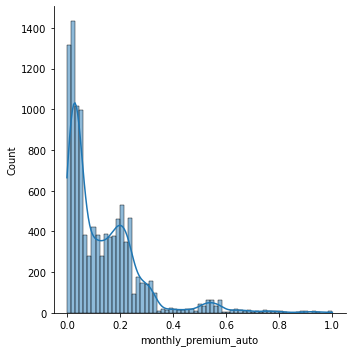

In [71]:
display(sns.displot(data_transformed_minmax['monthly_premium_auto'], kde=True))